## Procesamiento Digital de Imagenes - TP3

### Constants and functions

Importing libraries

In [529]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Defining constants and functions

In [487]:
YIQ_transform_matrix = np.mat('0.299 0.587 0.114; 0.595716 -0.274453 -0.321263; 0.211456 -0.522591 0.311135')

In [488]:
def rgb2yiq(image_RGB):
  # x and y dimensions
  x_size = image_RGB.shape[0]
  y_size = image_RGB.shape[1]

  # converting from RGB to YIQ
  image_yiq = np.zeros([x_size, y_size, 3])

  for px in range(0, x_size):
    for py in range(0, y_size):
      image_yiq[px, py, :] = np.dot( YIQ_transform_matrix, image_RGB[px , py ,:] )
  return image_yiq

In [489]:
def yiq2rgb(image_YIQ):
  # x and y dimensiones
  x_size = image_YIQ.shape[0]
  y_size = image_YIQ.shape[1]

  # RGB transform matrix
  RGB_transform_matrix = np.linalg.inv(YIQ_transform_matrix)

  # converting from YIQ to RGB
  image_rgb = np.zeros([x_size, y_size, 3])

  for px in range(0, x_size):
    for py in range(0, y_size):
      image_rgb[px, py, :] = np.dot( RGB_transform_matrix, image_YIQ[px , py ,:] )
  return image_rgb

### Histograms functions

In [490]:
def histogram(rgb_image, bins):
  rgb_image_copy = np.copy(rgb_image)
  yiq_image = rgb2yiq(rgb_image_copy)[...,0]
  bins_values = np.linspace(0, 1, num = bins)

  histogram_values = []
  count = np.zeros(bins)
  
  for row in yiq_image:
    inds = np.digitize(row, bins_values, right = True)
    histogram_values.append(inds)

  histogram_values = np.concatenate( histogram_values, axis=0 )
  for element in histogram_values:
    count[element-1] = count[element-1] + 1
  
  plt.plot(bins_values, count)

In [491]:
def gray_scale_histogram(grayscale_matrix, bins):
  bins_values = np.linspace(0, 1, num = bins)

  histogram_values = []
  count = np.zeros(bins)
  
  for row in grayscale_matrix:
    inds = np.digitize(row, bins_values, right = False)
    histogram_values.append(inds)

  histogram_values = np.concatenate( histogram_values, axis = 0 )
  for element in histogram_values:
    count[element-1] = count[element-1] + 1
  
  plt.plot(bins_values, count)

### Luminance filter functions

In [492]:
def square_change_luminance(rgb_image, alpha):
  rgb_image_copy = np.copy(rgb_image)
  yiq_image = rgb2yiq(rgb_image_copy)
  yiq_image[:, :, 0] = np.power(yiq_image[:, :, 0], alpha)
  return yiq2rgb(yiq_image)

### Normalize image functions

In [493]:
def normalize_y(rgb_image):
  rgb_image_copy = np.copy(rgb_image)
  yiq_image = rgb2yiq(rgb_image_copy)
  max_value = np.max(yiq_image[:, :, 0])
  yiq_image[:, :, 0] = yiq_image[:, :, 0]/max_value

  for vect in yiq_image[:, :, 0]:
    for px in vect:
        if px > 1: px = 1

  return yiq2rgb(yiq_image)

### Normalize histograms functions

In [494]:
def piecewise_map(image, x, y):
  for vect in image:
    for px in vect:
        if px < x[0]: px = y[0]
        if px > x[0] and px < x[1]: px = y[1]
        if px > x[1] and px < x[2]: px = y[2]
        if px > x[2] and px < x[3]: px = y[3]
        if px > x[3] and px < x[3]: px = y[3]
  return image

### Histograms and luminance

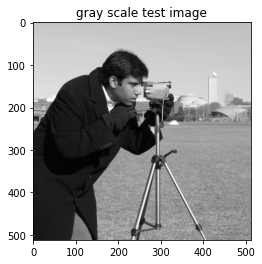

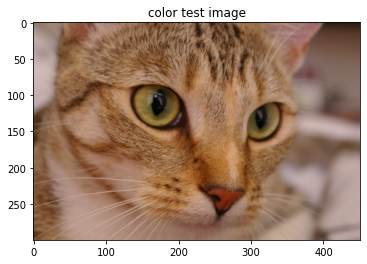

In [495]:
camera = imageio.imread('imageio:camera.png')/255.
plt.imshow(camera,'gray')
plt.title('gray scale test image')
plt.show()

chelsea = (imageio.imread('imageio:chelsea.png')[:,:,:3])/255.
plt.imshow(chelsea)
plt.title('color test image')
plt.show()

def hist_and_plot(im, title, bins):
    if im.ndim==2:
        counts, borders = np.histogram(im, bins = bins, range = (0,1))
    else:
        counts, borders = np.histogram(rgb2yiq(im)[...,0], bins = bins, range = (0,1))
    fig1 = plt.subplot(1,2,1)
    fig1.plot((borders[1:]+borders[:-1])/2, counts)
    fig2 = plt.subplot(1,2,2)
    if im.ndim==2:
        fig2.imshow(im, 'gray')
    else:
        fig2.imshow(im)    
    plt.title(title)
    plt.show()

### Implemented histograms function

Histogram

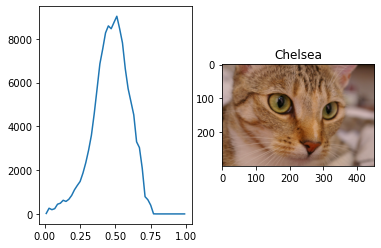

In [496]:
hist_and_plot(chelsea, 'Chelsea', 50)

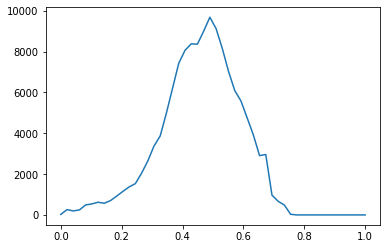

In [497]:
histogram(chelsea, 50)

Grayscale histogram

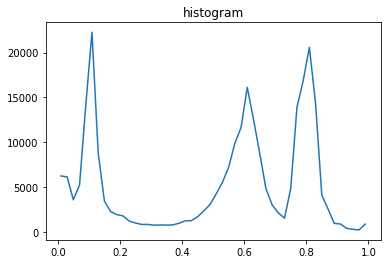

In [498]:
bins = 50
counts, borders = np.histogram(camera, bins = bins, range = (0,1))
plt.plot((borders[1:]+borders[:-1])/2, counts)
plt.title('histogram')
plt.show()

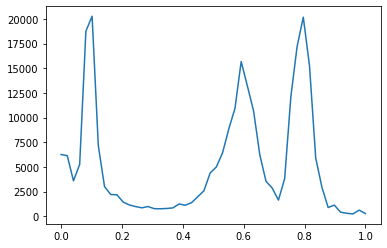

In [499]:
gray_scale_histogram(camera, 50)

### Change luminance as power function

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


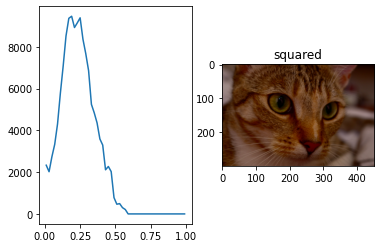

In [500]:
square = square_change_luminance(chelsea, 2)
hist_and_plot(square, 'squared', 50)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


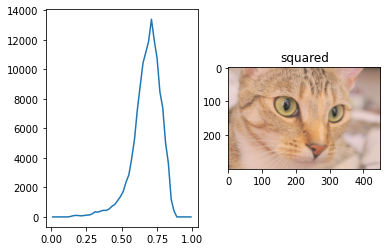

In [501]:
square = square_change_luminance(chelsea, 0.5)
hist_and_plot(square, 'squared', 50)

### Normalize images

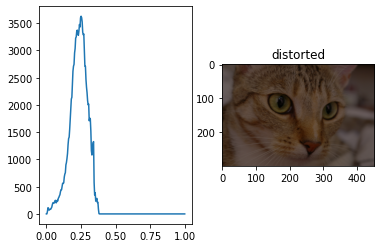

In [502]:
chelsea_distorted = chelsea * 0.5
hist_and_plot(chelsea_distorted, 'distorted', 256)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


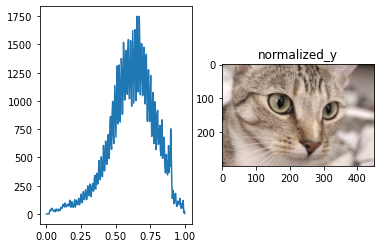

In [503]:
chelsea_norm = normalize_y(chelsea_distorted)
hist_and_plot(chelsea_norm, 'normalized_y', 256)

### Normalize histograms

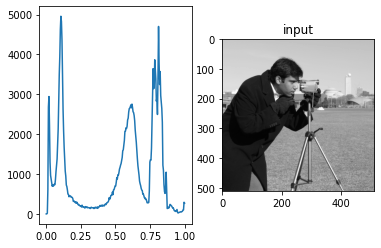

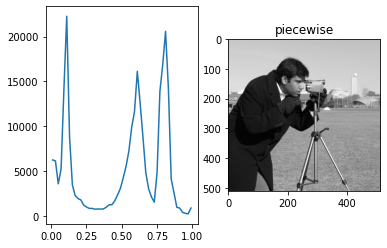

In [541]:
hist_and_plot(camera, 'input', 256)

x = np.array([0, 0.25, 0.75, 1])
y = np.array([0, 0.1, 0.9, 1])
hist_and_plot(piecewise_map(camera, x, y), 'piecewise', 50)